## Plots the mean activation per feature map for a specific layer given an input image

In [1]:
from fastai.conv_learner import *
from .. filtervisualizer import *

Set to `True` if you want to use your CPU for computation. 

Set to `False` for using CUDA.

In [6]:
CPU = True

In [7]:
layer = 42
filter = 64  # will be marked with a vertical line in the plot
total_filters_in_layer = 512

In [8]:
picture = PIL.Image.open("test/206px-Wattledcranethumb.jpg")

In [9]:
if CPU:
    model = vgg16(pre=True).eval()
else:
    model = vgg16(pre=True).cuda().eval()

In [10]:
sz = 224

In [11]:
train_tfms, val_tfms = tfms_from_model(vgg16, sz)

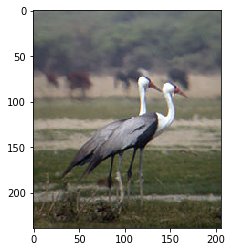

In [12]:
plt.imshow(picture)

In [13]:
transformed = val_tfms(np.array(picture)/255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


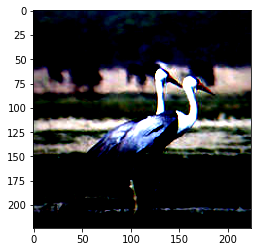

In [14]:
plt.imshow(transformed.transpose(1,2,0))

In [15]:
activations = SaveFeatures(list(model.children())[layer])

In [16]:
model(V(transformed)[None]);

In [17]:
mean_act = [activations.features[0,i].mean().item() for i in range(total_filters_in_layer)]

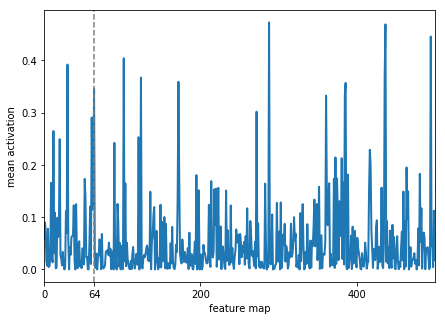

In [18]:
plt.figure(figsize=(7,5))
act = plt.plot(mean_act,linewidth=2.)
extraticks=[filter]
ax = act[0].axes
ax.set_xlim(0,500)
plt.axvline(x=filter, color='grey', linestyle='--')
ax.set_xlabel("feature map")
ax.set_ylabel("mean activation")
ax.set_xticks([0,200,400] + extraticks)
#plt.show()
plt.savefig('mean_activation_layer_'+str(layer)+'_filter_'+str(filter)+'.png')

In [20]:
thresh = 0.44
[i for i in range(total_filters_in_layer) if mean_act[i]>thresh]

[288, 437, 495]